<a href="https://colab.research.google.com/github/ykkim77/nlp_7th/blob/main/nlp_7th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import tensorflow as tf
import keras

from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [88]:
char2vec = {'h':np.array([1,0,0,0,0]),
            'e':np.array([0,1,0,0,0]),
            'l':np.array([0,0,1,0,0]),
            'o':np.array([0,0,0,1,0]),
            '<EOS>':np.array([0,0,0,0,1])}
idx2char = ['h','e','l','o','<EOS>']

In [89]:
print(char2vec['l'])

[0 0 1 0 0]


In [90]:
idx2char[2]

'l'

In [91]:
from tensorflow.keras.layers import Embedding


In [92]:
tf.random.set_seed(1)
inputs = Input(shape=())
embeded = Embedding(input_dim=5, output_dim=2)(inputs)
model = Model(inputs, embeded)

In [93]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
embedding (Embedding)        (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.layers[1].get_weights()

[array([[-0.03348692,  0.04014813],
        [ 0.01309742, -0.00654539],
        [-0.0208061 ,  0.01425021],
        [ 0.04757855, -0.00649005],
        [ 0.01601019,  0.01048958]], dtype=float32)]

In [95]:
model.predict([0])

array([[-0.03348692,  0.04014813]], dtype=float32)

In [96]:
w_xh = np.array([[-2.6, -1.6, -2.1],
                 [1.2, 0.4, 0.3],
                 [2.1, 1.9, -0.7],
                 [-1.4, -1.5, 2.5],
                 [-0.9, 0.4, -0.9]])

w_hh = np.array([[-0.5, -2.3, 2.9],
                 [1.9, 1.5, 1.7],
                 [-0.7, -1.2, 1.5]])

b_h = np.array([-0.5, -0.4, -1.])

w_hy = np.array([[ 0.3, -2.6, 1.2, 2.6, -1.1],
                 [-1.1, -2.4, 2.2, 1.6, -2.4],
                 [-0.4, -3.1, -3., 3.6, 3.]])

b_y = np.array([-1.8, -0.5, 1.3, 0.1, 0.8])


In [97]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = -1)

# Time step 1

In [98]:
init_h = np.array([0,0,0])
x_0 = char2vec['h']
a_1 = np.dot(init_h,w_hh) + np.dot(x_0,w_xh) + b_h
h_1 = np.tanh(a_1)
y_1 = np.dot(h_1, w_hy) + b_y
o_1 = softmax(y_1)


In [99]:
print("1번째 timestep의 hidden: {}".format(h_1) )
print("1번째 timestep의 output: {}".format(y_1) )
print("1번째 timestep의 result: {}".format(idx2char[np.argmax(o_1)]))

1번째 timestep의 hidden: [-0.99594936 -0.96402758 -0.99594936]
1번째 timestep의 output: [-0.63997473  7.49057754  0.97184817 -7.61733016  1.22136241]
1번째 timestep의 result: e


# time step 2

In [100]:
x_1 = char2vec['e']
a_2 = np.dot(h_1,w_hh) + np.dot(x_1,w_xh) + b_h
h_2 = np.tanh(a_2)
y_2 = np.dot(h_2, w_hy) + b_y
o_2 = softmax(y_2)

In [101]:
print("2번째 timestep의 hidden: {}".format(h_2) )
print("2번째 timestep의 output: {}".format(y_2) )
print("2번째 timestep의 result: {}".format(idx2char[np.argmax(o_2)]))

2번째 timestep의 hidden: [ 0.06340167  0.96673299 -0.99999709]
2번째 timestep의 output: [-2.44438695  0.11498748  6.50288586 -1.78837242 -4.58989229]
2번째 timestep의 result: l


# Tensorflow keras 를 이용한 RNN

In [102]:
from tensorflow.keras.layers import Input, Dense, RNN
from tensorflow.keras.layers import SimpleRNNCell

In [103]:
n_inputs = 5
n_steps = 5
n_neurons = 3
n_outputs = n_inputs

In [104]:
inputs = Input(shape=(n_steps, n_inputs))
hidden = RNN(SimpleRNNCell(n_neurons), return_sequences=True)(inputs)
output = Dense(n_outputs, activation= 'softmax')(hidden)


model = Model(inputs, output)

In [105]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 5, 5)]            0         
_________________________________________________________________
rnn (RNN)                    (None, 5, 3)              27        
_________________________________________________________________
dense_1 (Dense)              (None, 5, 5)              20        
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.set_weights([w_xh,w_hh,b_h,w_hy,b_y])

In [107]:
input_values = "hello"
print("입력값: ", list(input_values))
input_vecs = np.stack([char2vec[char]
                      for char in input_values])[np.newaxis]

result = model.predict(input_vecs)
result_indices = np.argmax(result, axis=-1)[0]
print("출력값: ", [idx2char[idx] for idx in result_indices])

입력값:  ['h', 'e', 'l', 'l', 'o']
출력값:  ['e', 'l', 'l', 'o', '<EOS>']


simple RNN 클래스를 활용한 RNN 모델

In [108]:
from tensorflow.keras.layers import SimpleRNN

inputs = Input(shape=(n_steps, n_inputs))
hidden = SimpleRNN(n_neurons, return_sequences=True)(inputs)
output = Dense(n_outputs,activation='softmax')(hidden)

In [109]:
model = Model(inputs, output)

In [110]:
model.set_weights([w_xh,w_hh,b_h,w_hy,b_y])

In [111]:
input_values = "hello"
print("입력값: ", list(input_values))
input_vecs = np.stack([char2vec[char]
                      for char in input_values])[np.newaxis]

result = model.predict(input_vecs)
result_indices = np.argmax(result, axis=-1)[0]
print("출력값: ", [idx2char[idx] for idx in result_indices])

입력값:  ['h', 'e', 'l', 'l', 'o']
출력값:  ['e', 'l', 'l', 'o', '<EOS>']


In [112]:
%matplotlib inline
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [113]:
def generate_timeseries(n_steps=50):
    m_x = np.random.uniform(0,10)
    xs = np.linspace(0,5, n_steps+1)
    ys = np.array([0.5*np.sin(2*np.pi*(x+m_x))+ np.cos(3*np.pi/2*(x+m_x/4)) + np.random.uniform(-0.1,0.1) for x in xs])
    return ys[:-1],ys[-1]

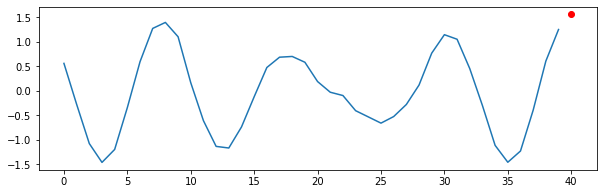

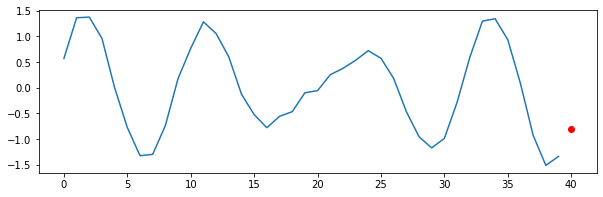

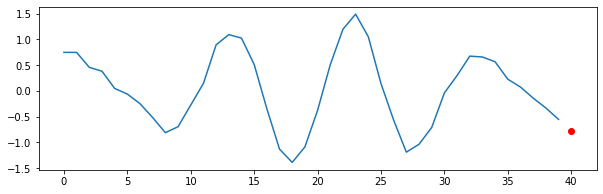

In [114]:
for _ in range(3):
    xs, ys = generate_timeseries(n_steps=40)
    timesteps = np.arange(len(xs)+1)
    plt.figure(figsize=(10,3))
    plt.plot(timesteps[:-1],xs)
    plt.scatter(timesteps[-1],ys,c='r')
    plt.show

In [115]:
K.clear_session()

In [116]:
n_inputs = 1
n_steps  = 50
n_neurons = 200
n_outputs = n_inputs

In [117]:
inputs = Input(shape=(n_steps, n_inputs))
hidden = SimpleRNN(n_neurons,return_state=False)(inputs)
output = Dense(1)(hidden)

In [118]:
model = Model(inputs, output)

In [119]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 200)               40400     
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.compile(loss= 'mse', optimizer=Adam(lr=1e-4))

In [121]:
def timeseries_generator(n_steps = 50, batch_size = 32):
    while True:
        batch_xs, batch_ys = [], []
        for _ in range(batch_size):
            x, y = generate_timeseries(n_steps)
            batch_xs.append(x[:,np.newaxis])
            batch_ys.append(y[np.newaxis])
            yield np.stack(batch_xs), np.stack(batch_ys)

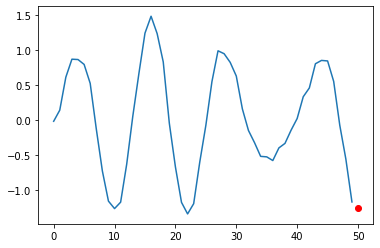

In [122]:
train_gen = timeseries_generator(batch_size = 3)
batch_x, batch_y = next(train_gen)

for xs, y in zip(batch_x, batch_y):
    plt.plot(xs)
    plt.scatter(len(xs), y, c='r')
    plt.show()

In [123]:
tarin_gen = timeseries_generator(n_steps, batch_size=16)
hist = model.fit_generator(train_gen,steps_per_epoch= 20, epochs = 20 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/20 [==============================] - 1s 15ms/step - loss: 0.5531
Epoch 2/20
20/20 [==============================] - 0s 16ms/step - loss: 0.0135
Epoch 3/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0179
Epoch 4/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0113
Epoch 5/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0172
Epoch 6/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0292
Epoch 7/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0218
Epoch 8/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0076
Epoch 9/20
20/20 [==============================] - 0s 16ms/step - loss: 0.0136
Epoch 10/20
20/20 [==============================] - 0s 13ms/step - loss: 0.0347
Epoch 11/20
20/20 [==============================] - 0s 15ms/step - loss: 0.0168
Epoch 12/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0078
Epoch 13/20
20/20 [==================

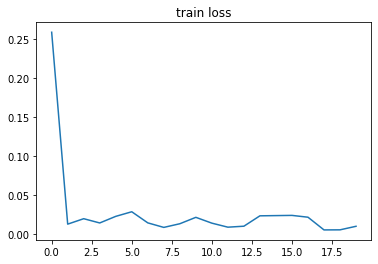

In [124]:
plt.title("train loss")
plt.plot(hist.history['loss'])
plt.show()

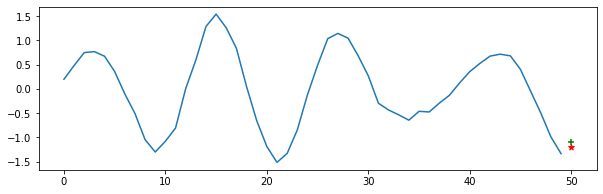

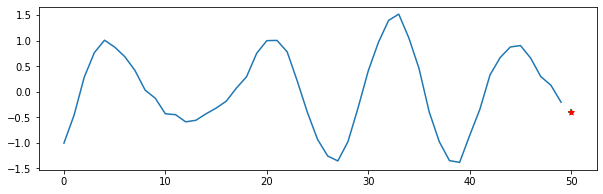

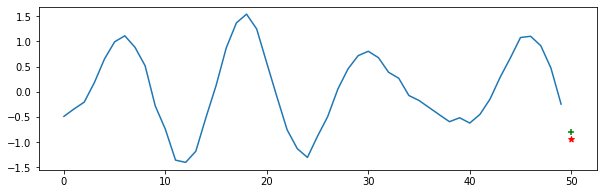

In [125]:
for _ in range(3):
    xs, y_true = generate_timeseries(n_steps)
    timesteps = np.arange(len(xs)+1)

    xs = xs[np.newaxis, :, np.newaxis]
    y_pred = model.predict(xs).squeeze()

    plt.figure(figsize=(10,3))
    plt.plot(timesteps[:-1],xs.squeeze())


    plt.scatter(timesteps[-1],y_true,c='g', marker = '+')
    plt.scatter(timesteps[-1],y_pred,c='r', marker = '*')
    plt.show()